In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
import seaborn as sn

In [57]:
df=pd.read_csv(r"health.csv")
df.head()

,Disease,Age,Gender,Smoker status
0,diseased,43,Male,Smoker
1,not diseased,18,Male,Smoker
2,diseased,22,Female,Non-smoker
3,diseased,25,Male,Non-smoker
4,not diseased,45,Female,Smoker


In [58]:
df['Smoker status'] = df['Smoker status'].map({'Non-smoker': 0, 'Smoker': 1})
df['Disease'] = df['Disease'].map({'not diseased': 0, 'diseased': 1})
df.shape
df.head()

,Disease,Age,Gender,Smoker status
0,1,43,Male,1
1,0,18,Male,1
2,1,22,Female,0
3,1,25,Male,0
4,0,45,Female,1


In [59]:
x=df[["Age","Gender","Smoker status"]]
y=df["Disease"]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,random_state=42)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(28, 3)

(8, 3)

(28,)

(8,)

In [61]:
model=LogisticRegression(solver='liblinear',max_iter=1000)

In [62]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

ValueError: could not convert string to float: 'Male'

In [63]:
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: ",conf_mat)
Accuracy_Score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score: ",Accuracy_Score)
print("ACcuracy in %: ", Accuracy_Score*100, "%")

Confusion Matrix:  [[1 1]
 [0 6]]
Accuracy Score:  0.875
ACcuracy in %:  87.5 %


<Axes: xlabel='Predicted', ylabel='Actual'>

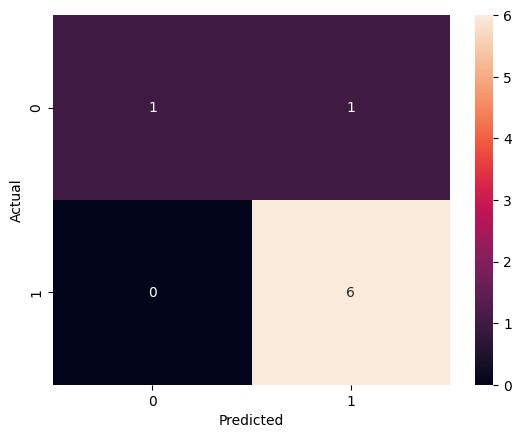

In [64]:
conf_mat=pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_mat,annot=True)